<a href="https://colab.research.google.com/github/SquirrelMan/fuzzy_svm/blob/master/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip uninstall statsmodels -y
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels
# 模型相关包
import statsmodels.api as sm
import statsmodels.stats.diagnostic
# 画图包
import matplotlib.pyplot as plt
# 其他包
import pandas as pd
import numpy as np

#--------------------- 
#作者：mooncrystal123 
#来源：CSDN 
#原文：https://blog.csdn.net/mooncrystal123/article/details/86736397 
#版权声明：本文为博主原创文章，转载请附上博文链接！

Uninstalling statsmodels-0.9.0:
  Successfully uninstalled statsmodels-0.9.0
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-94w03769
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-94w03769
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ggyn0qc/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels


In [3]:
# https://keras.io/
!pip install -q keras
import keras
import tensorflow as tf
import math
import random
from google.colab import files
from __future__ import print_function
%matplotlib inline

Using TensorFlow backend.


In [4]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2330_台積電_TW.csv to 2330_台積電_TW.csv
User uploaded file "2330_台積電_TW.csv" with length 16570 bytes


In [6]:
stk_data=pd.read_csv('2330_台積電_TW.csv')
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,231.5,232.5,231.0,232.5,224.324173,18055269
1,2018-01-03,236.0,238.0,235.5,237.0,228.665939,29308091
2,2018-01-04,240.0,240.0,236.5,239.5,231.078018,29096613
3,2018-01-05,240.0,240.0,238.0,240.0,231.560440,22438255
4,2018-01-08,242.0,242.5,240.5,242.0,233.490112,20233692


In [7]:
stk_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
302,2019-04-08,251.0,253.0,250.5,253.0,253.0,45184821
303,2019-04-09,253.0,254.0,252.0,254.0,254.0,22355674
304,2019-04-10,253.0,254.5,252.0,254.0,254.0,25849934
305,2019-04-11,253.0,254.0,251.5,252.0,252.0,24896840
306,2019-04-12,251.5,253.0,251.0,252.0,252.0,13548148


In [0]:
from scipy.ndimage.interpolation import shift

stk_date=stk_data[:]['Date']
stk_open=stk_data[:]['Open']
stk_high=stk_data[:]['High']
stk_low=stk_data[:]['Low']
stk_close=stk_data[:]['Close']
stk_volume=stk_data[:]['Volume']

stk_adj_ratio=(stk_close-stk_open)/stk_open
stk_adj_var_11 = []
stk_adj_ar_11 = []
stk_adj_avg_11 = []

for i in range(11,len(stk_close)):
  stk_adj_var_11.append(np.var(stk_close[i-11:i]))
  stk_adj_ar_11.append((np.sum(stk_high[i-11:i])-np.sum(stk_open[i-11:i]))/(np.sum(stk_open[i-11:i])-np.sum(stk_low[i-11:i])))
  stk_adj_avg_11.append(np.mean(stk_adj_ratio[i-11:i]))

In [9]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_adj_ratio)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-19.7067
p-value,0
Lags Used,0
Number of Observations Used,306
Critical Value(1%),-3.4519
Critical Value(5%),-2.87103
Critical Value(10%),-2.57183


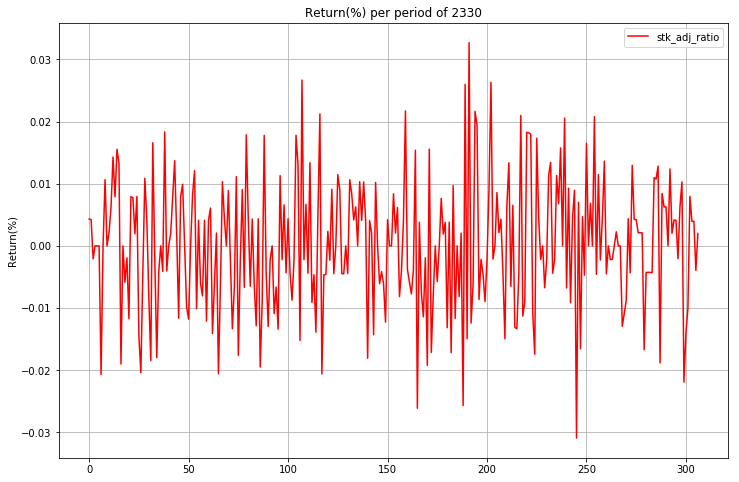

In [10]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_adj_ratio,'r',label='stk_adj_ratio')
plt.title('Return(%) per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_adj_var_11)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-7.43278
p-value,6.29659e-11
Lags Used,2
Number of Observations Used,293
Critical Value(1%),-3.45287
Critical Value(5%),-2.87146
Critical Value(10%),-2.57205


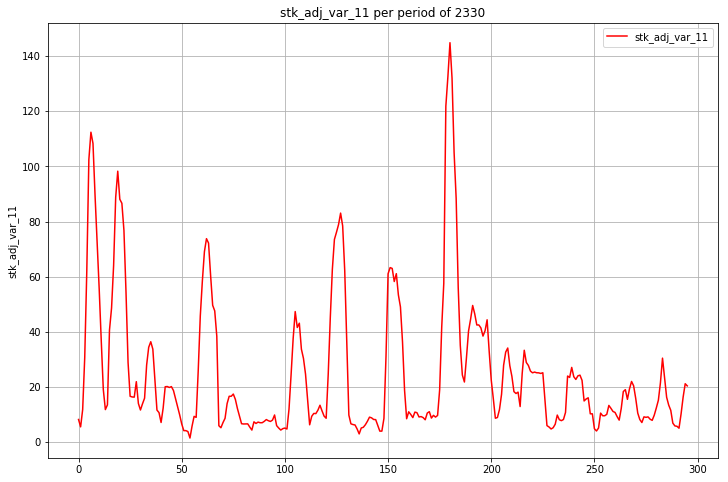

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_adj_var_11,'r',label='stk_adj_var_11')
plt.title('stk_adj_var_11 per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('stk_adj_var_11')
plt.show()

In [81]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_adj_ar_11)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-3.09656
p-value,0.0268088
Lags Used,11
Number of Observations Used,284
Critical Value(1%),-3.45359
Critical Value(5%),-2.87177
Critical Value(10%),-2.57222


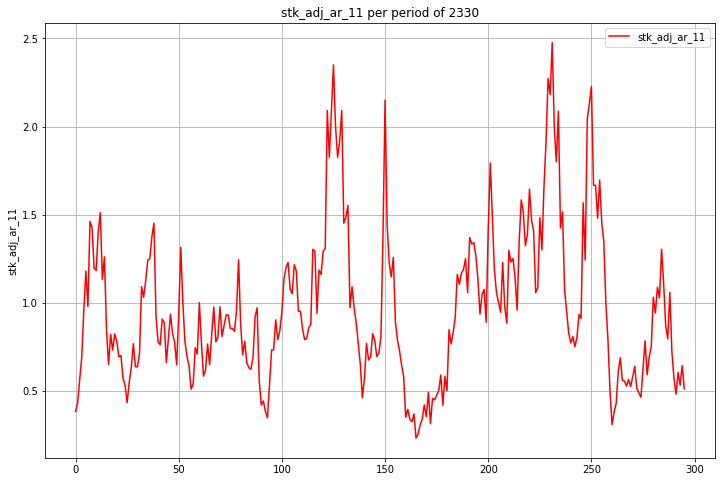

In [82]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_adj_ar_11,'r',label='stk_adj_ar_11')
plt.title('stk_adj_ar_11 per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('stk_adj_ar_11')
plt.show()

In [201]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_adj_avg_11)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-3.19972
p-value,0.0200011
Lags Used,15
Number of Observations Used,280
Critical Value(1%),-3.45392
Critical Value(5%),-2.87192
Critical Value(10%),-2.5723


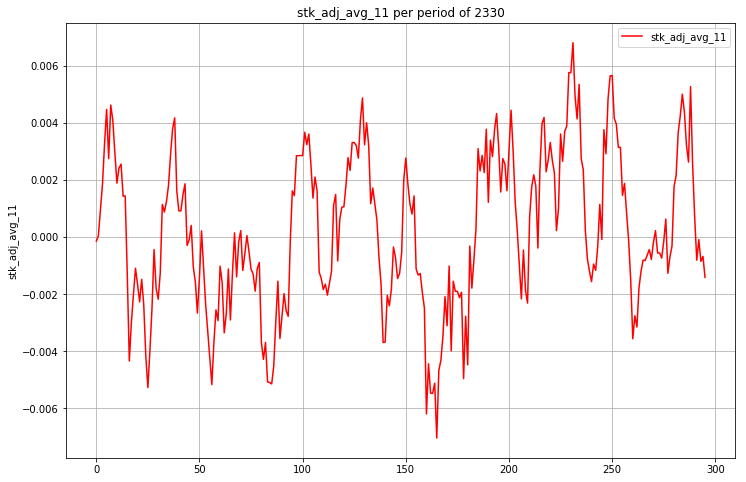

In [202]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_adj_avg_11,'r',label='stk_adj_avg_11')
plt.title('stk_adj_avg_11 per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('stk_adj_avg_11')
plt.show()

In [15]:
result = sm.tsa.stattools.coint(stk_adj_ratio[11:],stk_adj_var_11)
pvalue = result[1]
pvalue

0.0

In [187]:
result = sm.tsa.stattools.coint(stk_adj_ratio[11:],stk_adj_ar_11)
pvalue = result[1]
pvalue

0.0

In [203]:
result = sm.tsa.stattools.coint(stk_adj_ratio[11:],stk_adj_avg_11)
pvalue = result[1]
pvalue

0.0

In [0]:
from scipy.ndimage.interpolation import shift
all_date = {
    'stk_date':np.array(stk_date[11:]),
}
all_stk_adj_ratio = {
    'stk_adj_ratio': np.array(stk_adj_ratio[11:])
}
all_data = {
            'stk_adj_ratio_lag1':shift(stk_adj_ratio[11:],1),
            'stk_adj_var_11': np.array(stk_adj_var_11),
            'stk_adj_var_11_lag1': shift(stk_adj_var_11,1),
            'stk_adj_var_11_lag2': shift(stk_adj_var_11,2),
            'stk_adj_ar_11':np.array(stk_adj_ar_11),
            'stk_adj_avg_11':np.array(stk_adj_avg_11),
            }
all_data = pd.DataFrame(all_data)
all_data = all_data[2:]
all_date = pd.DataFrame(all_date)
all_date = all_date[2:]
all_stk_adj_ratio = pd.DataFrame(all_stk_adj_ratio)
all_stk_adj_ratio = all_stk_adj_ratio[2:]


In [205]:
all_data

,stk_adj_ratio_lag1,stk_adj_var_11,stk_adj_var_11_lag1,stk_adj_var_11_lag2,stk_adj_ar_11,stk_adj_avg_11
2,1.428571e-02,11.834711,5.561983,8.231405,0.562500,0.000953
3,7.889546e-03,30.743802,11.834711,5.561983,0.688889,0.001859
4,1.553398e-02,62.194215,30.743802,11.834711,0.952381,0.003272
5,1.333333e-02,102.458678,62.194215,30.743802,1.179487,0.004484
6,-1.901141e-02,112.376033,102.458678,62.194215,0.978723,0.002755
7,1.387234e-18,108.289256,112.376033,102.458678,1.461538,0.004637
8,-5.847953e-03,89.446281,108.289256,112.376033,1.425000,0.004106
9,-1.930502e-03,72.566116,89.446281,108.289256,1.195652,0.002961
10,-1.171875e-02,55.698347,72.566116,89.446281,1.183673,0.001896
11,7.905138e-03,36.884298,55.698347,72.566116,1.404255,0.002425


In [206]:

all_date

,stk_date
2,2018-01-19
3,2018-01-22
4,2018-01-23
5,2018-01-24
6,2018-01-25
7,2018-01-26
8,2018-01-29
9,2018-01-30
10,2018-01-31
11,2018-02-01


In [207]:
all_stk_adj_ratio

,stk_adj_ratio
2,0.007890
3,0.015534
4,0.013333
5,-0.019011
6,0.000000
7,-0.005848
8,-0.001931
9,-0.011719
10,0.007905
11,0.007767


In [229]:
all_stk_adj_ratio.describe()

,stk_adj_ratio
count,294.000000
mean,0.000115
std,0.010516
min,-0.030905
25%,-0.006373
50%,0.000000
75%,0.006969
max,0.032680


In [1771]:

label = []
label_buy = []
label_sell = []
for i in range(0,len(all_stk_adj_ratio)):
  if i < 194:
    temp_buy = math.exp(((np.array(all_stk_adj_ratio)[i][0])-0.000115)/0.010516)
    temp_sell =math.sqrt(math.exp(((np.array(all_stk_adj_ratio)[i][0])-0.000115)/0.010516*(-1))+0.5)
    label_buy.append(temp_buy)
    label_sell.append(temp_sell)
    if temp_buy >= temp_sell:
      label.append(temp_buy)
    else:
      label.append(temp_buy/2)
  else:
    label.append((np.array(all_stk_adj_ratio)[i][0]>=0)*1)
label


[2.0944823271931097,
 4.332913028252238,
 3.514767931314249,
 0.0811108739573096,
 0.49456193028911416,
 0.28360200014783965,
 0.41161761192759083,
 0.1622760740418747,
 2.0975901027043737,
 2.07021440002106,
 1.188440415588056,
 2.110192034440011,
 0.125360468005371,
 0.071022377780452,
 0.33249458220932027,
 2.7806533772106996,
 1.4812066023607222,
 0.22719620097640672,
 0.08561876775379548,
 4.794044951090547,
 0.4079628199588238,
 0.08960503023033622,
 0.3349382503275909,
 0.49456193028911416,
 0.3341317946703072,
 5.65260595532964,
 0.33705027183403224,
 0.49456193028911416,
 1.1963205830660182,
 2.1038566294891425,
 3.6390066262917857,
 1.190568742342165,
 0.1636839768729636,
 2.0975901027043737,
 2.5359822283808784,
 0.49456193028911416,
 0.19468564715862258,
 0.16121373478411652,
 0.49456193028911416,
 2.1740364094310625,
 3.124846449527705,
 0.189262529325974,
 1.4628612650543196,
 0.2779246433162939,
 0.23005877631317637,
 1.4628612650543196,
 0.15654625393082117,
 1.45935344

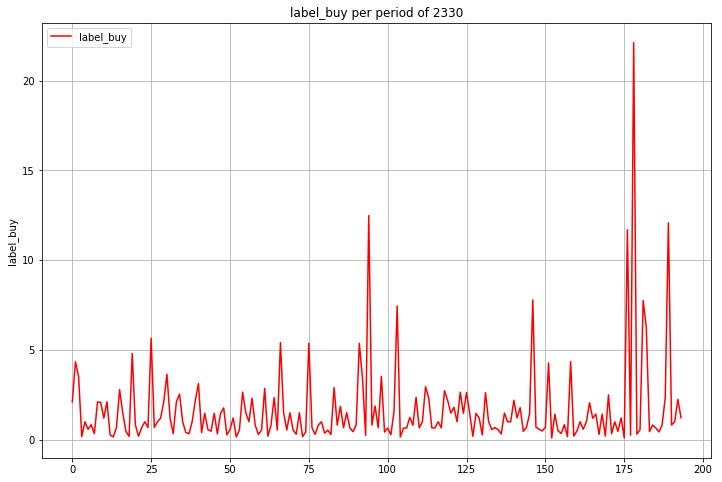

In [1772]:
fig = plt.figure(figsize=(12,8))
plt.plot(label_buy,'r',label='label_buy')
plt.title('label_buy per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('label_buy')
plt.show()

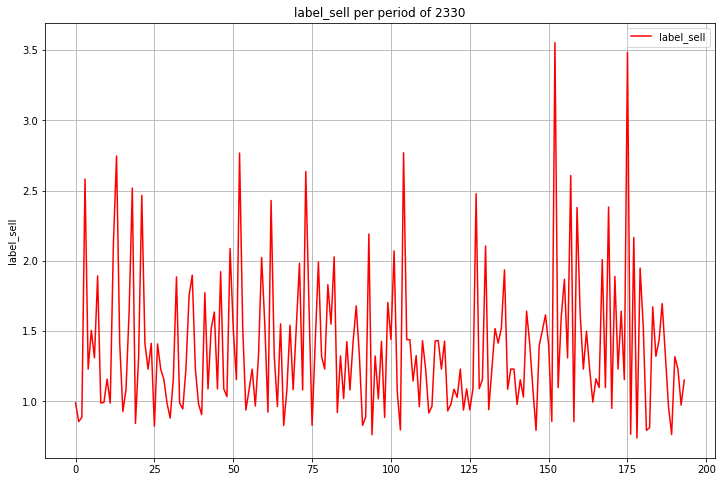

In [1773]:
fig = plt.figure(figsize=(12,8))
plt.plot(label_sell,'r',label='label_sell')
plt.title('label_sell per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('label_sell')
plt.show()

In [0]:
x_train = all_data[:193]
x_test = all_data[193:-1]
y_train = pd.DataFrame(label[1:194])
y_test = pd.DataFrame(label[194:])

In [1751]:
y_train.describe()

,0
count,193.000000
mean,1.457003
std,2.516144
min,0.041260
25%,0.262360
50%,0.494562
75%,1.851604
max,22.124485


In [1752]:
y_test.describe()

,0
count,100.000000
mean,0.600000
std,0.492366
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [1753]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#使用Support Vector Classifier來建立模型
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1754]:
predictions = model.predict(x_test)
#scores = model.score(x_test,y_test)

#mse = np.mean((predictions-y_test)**2)
#r_squared = scores

count_TP=0
count_TN=0
count_FN=0
count_FP=0
for i in range(0,len(y_test)):
  if np.array(y_test)[i][0] >= 1 and np.array(predictions)[i][0] >= 1 :
    count_TP=count_TP+1
  if np.array(y_test)[i][0] < 1 and np.array(predictions)[i][0] < 1 :
    count_TN=count_TN+1
  if np.array(y_test)[i][0] >= 1 and np.array(predictions)[i][0] < 1 :
    count_FN=count_FN+1
  if np.array(y_test)[i][0] < 1 and np.array(predictions)[i][0] >= 1 :
    count_FP=count_FP+1
confusion_matrix = [[count_TP,count_FN],[count_FP,count_TN]]
confusion_matrix
#print(mse[0])
#print(r_squared)

[[43, 17], [23, 17]]

In [1755]:
predictions

array([[ 1.75312513],
       [ 1.77552785],
       [ 1.42223396],
       [ 1.5731157 ],
       [ 2.34415988],
       [ 0.66870742],
       [ 0.20684477],
       [ 0.49407347],
       [ 0.55148385],
       [ 0.86422834],
       [ 0.96135071],
       [ 1.10516404],
       [ 1.86020485],
       [ 1.4179727 ],
       [ 1.57311825],
       [ 0.86215219],
       [ 1.27532222],
       [ 0.93080519],
       [ 1.01966058],
       [ 1.28108516],
       [ 0.33539276],
       [ 1.53702075],
       [ 1.8397984 ],
       [ 0.82291406],
       [ 0.96345116],
       [ 0.57100589],
       [ 0.99509654],
       [ 1.15532712],
       [ 1.19125622],
       [ 1.27494321],
       [ 1.09488204],
       [ 1.58514679],
       [ 0.45030503],
       [-0.4950052 ],
       [ 0.10638215],
       [-0.15895221],
       [-0.21804917],
       [ 0.06047077],
       [ 0.79277552],
       [ 0.11582465],
       [ 0.39743321],
       [ 0.6735573 ],
       [ 0.63450001],
       [ 2.37009016],
       [ 1.21536872],
       [ 2

In [1756]:
len(all_stk_adj_ratio[193:])

101

In [1757]:
len(predictions)

100

In [1758]:
add1_all_stk_adj_ratio=all_stk_adj_ratio[193:]+1
add1_all_stk_adj_ratio.head(5)

,stk_adj_ratio
195,1.002137
196,1.004292
197,0.995789
198,0.985075
199,1.006522


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


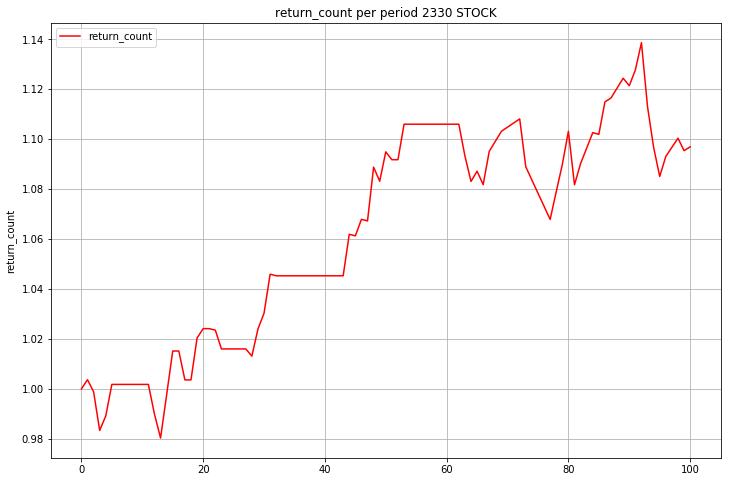

In [1759]:
return_count = []
return_count.append(1.0)
for i in range(1,len(add1_all_stk_adj_ratio)):
    if predictions[i-1]>=1:
        return_count.append(return_count[i-1]*add1_all_stk_adj_ratio.as_matrix()[i]*0.9994)
    else:
        return_count.append(return_count[i-1])
return_count
fig = plt.figure(figsize=(12,8))
plt.plot(return_count,'r',label='return_count')
plt.title('return_count per period 2330 STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('return_count')
plt.show()

In [1760]:
label = []
for i in range(0,len(all_stk_adj_ratio)):
  label.append((np.array(all_stk_adj_ratio)[i][0]>0)*1+(np.array(all_stk_adj_ratio)[i][0]<0)*(-1))
label


[1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1

In [0]:
x_train = all_data[:193]
x_test = all_data[193:-1]
y_train = pd.DataFrame(label[1:194])
y_test = pd.DataFrame(label[194:])

In [1762]:
y_train.describe()

,0
count,193.000000
mean,-0.072539
std,0.954661
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


In [1763]:
y_test.describe()

,0
count,100.00000
mean,0.11000
std,0.95235
min,-1.00000
25%,-1.00000
50%,1.00000
75%,1.00000
max,1.00000


In [1764]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#使用Support Vector Classifier來建立模型
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1765]:
predictions = model.predict(x_test)
#scores = model.score(x_test,y_test)

#mse = np.mean((predictions-y_test)**2)
#r_squared = scores

count_TP=0
count_TN=0
count_FN=0
count_FP=0
for i in range(0,len(y_test)):
  if np.array(y_test)[i][0] >= 0 and np.array(predictions)[i][0] >= 0 :
    count_TP=count_TP+1
  if np.array(y_test)[i][0] < 0 and np.array(predictions)[i][0] < 0 :
    count_TN=count_TN+1
  if np.array(y_test)[i][0] >= 0 and np.array(predictions)[i][0] < 0 :
    count_FN=count_FN+1
  if np.array(y_test)[i][0] < 0 and np.array(predictions)[i][0] >= 0 :
    count_FP=count_FP+1
confusion_matrix = [[count_TP,count_FN],[count_FP,count_TN]]
confusion_matrix
#print(mse[0])
#print(r_squared)

[[24, 36], [14, 26]]

In [1766]:
predictions

array([[-0.12051766],
       [-0.1139106 ],
       [-0.16728926],
       [-0.11397617],
       [ 0.05297591],
       [-0.00827275],
       [ 0.04086439],
       [ 0.101026  ],
       [-0.05687542],
       [ 0.02635585],
       [ 0.01831544],
       [-0.051823  ],
       [-0.01796854],
       [ 0.02151395],
       [ 0.04710477],
       [-0.05903038],
       [-0.04414849],
       [-0.09513606],
       [ 0.01149424],
       [ 0.08647948],
       [-0.18244211],
       [ 0.0459976 ],
       [ 0.12770456],
       [-0.02873348],
       [ 0.04511253],
       [ 0.07103875],
       [-0.00900108],
       [-0.01390852],
       [-0.01908197],
       [-0.02736606],
       [-0.01527386],
       [ 0.07101408],
       [ 0.06078372],
       [ 0.11263734],
       [ 0.18593256],
       [ 0.24388962],
       [ 0.25039188],
       [ 0.19912437],
       [ 0.17138815],
       [ 0.16281384],
       [ 0.16905839],
       [ 0.05204019],
       [-0.04823561],
       [ 0.05533913],
       [-0.09254683],
       [-0

In [1767]:
len(all_stk_adj_ratio[193:])

101

In [1768]:
len(predictions)

100

In [1769]:
add1_all_stk_adj_ratio=all_stk_adj_ratio[193:]+1
add1_all_stk_adj_ratio.head(5)

,stk_adj_ratio
195,1.002137
196,1.004292
197,0.995789
198,0.985075
199,1.006522


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


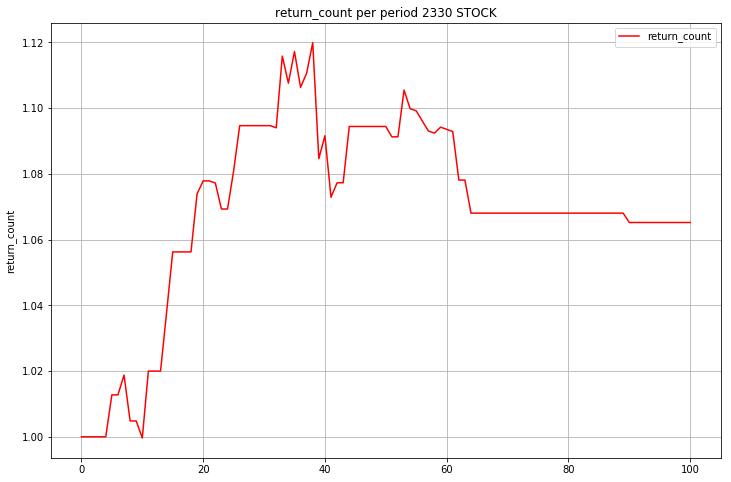

In [1770]:
return_count = []
return_count.append(1.0)
for i in range(1,len(add1_all_stk_adj_ratio)):
    if predictions[i-1]>=0:
        return_count.append(return_count[i-1]*add1_all_stk_adj_ratio.as_matrix()[i]*0.9994)
    else:
        return_count.append(return_count[i-1])
return_count
fig = plt.figure(figsize=(12,8))
plt.plot(return_count,'r',label='return_count')
plt.title('return_count per period 2330 STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('return_count')
plt.show()